#  (Ford GoBike System Data 2017)


### By Ali Qublan Algarni

## Investigation Overview
I wil investigate the factors can impact on trip duration on Ford GoBike System. And study the realtionship between tow more and columns. I will use unitivariate, biltivariate, and multivariate exploration. The main factors that i will foucs on are Duration time, months, gender, age, and user type (Subscriber and Customer)

## Dataset Overview
This data set includes information about individual rides in 2017 made in a bike-sharing system covering the greater San Francisco Bay area.
Bay Area Bike Share is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.
The source data (Ford GoBike System Data) is available at : https://www.fordgobike.com/system-data.
The above mentioned Data Set focuses on information with regard to the individual rides undertaken in a bike-sharing system expanded over the greater San Francisco Bay Area.


In [60]:
# Initialization 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [61]:
# Loading dataset 
clean_bike=pd.read_csv('enhanced_2017.csv')
clean_bike.head(10)
base_color=sns.color_palette()[0]

## Rider Per Weekday and Months

#### Riders tend to rent a bike during a week but Tuesday and Wednesday are the deamded. October is the highest demaded month during the year.

Text(0.5, 1.0, 'Riders Per Months')

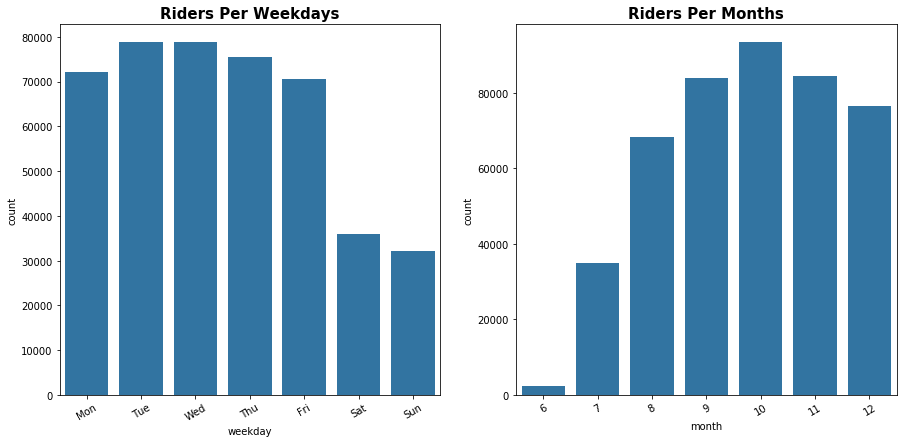

In [62]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
# Find out which week day has a highly demanded
weekday=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.countplot(data=clean_bike,x='weekday',color=base_color,order=weekday)
plt.xticks(rotation=30)
plt.title('Riders Per Weekdays', fontsize=15, fontweight='semibold')

plt.subplot(2,2,2)
# Monthly sharing system
sns.countplot(data=clean_bike,x='month',color=base_color)
plt.xticks(rotation=30)
plt.title('Riders Per Months', fontsize=15, fontweight='semibold')

##  Distribution of trip duration in Minutes and Hours

#### Diagram shows that the averge duration in minutes is 13.8.


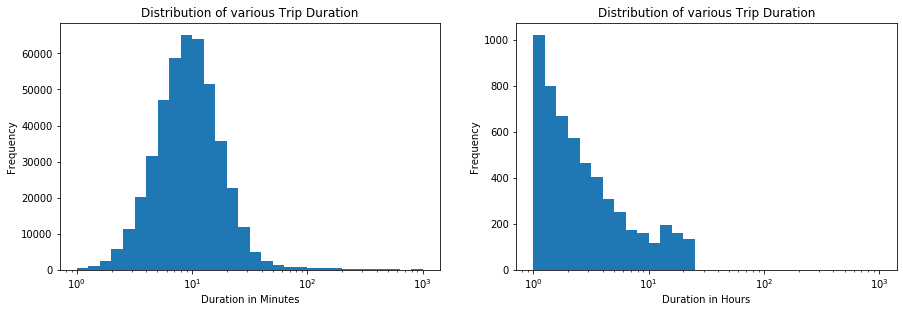

In [135]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = clean_bike , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of  Trip Duration in Minutes')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

plt.subplot(2,2,4)
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = clean_bike , x = 'duration_hr' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of Trip Duration in Hours')
plt.xlabel('Duration in Hours');
plt.ylabel('Frequency')
plt.xscale('log');

## User type Proportion

### Diagram shows that Subscriber user type is the most by 89% and customers about 11%

In [136]:
customer = clean_bike.query('user_type == "Customer"')['bike_id'].count()
subscriber = clean_bike.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / clean_bike['bike_id'].count()
subscriber_proportion = subscriber / clean_bike['bike_id'].count()

In [137]:
male = clean_bike.query('member_gender == "Male"')['bike_id'].count()
female = clean_bike.query('member_gender == "Female"')['bike_id'].count()

male_proportion = male / clean_bike['bike_id'].count()
female_proportion = female / clean_bike['bike_id'].count()

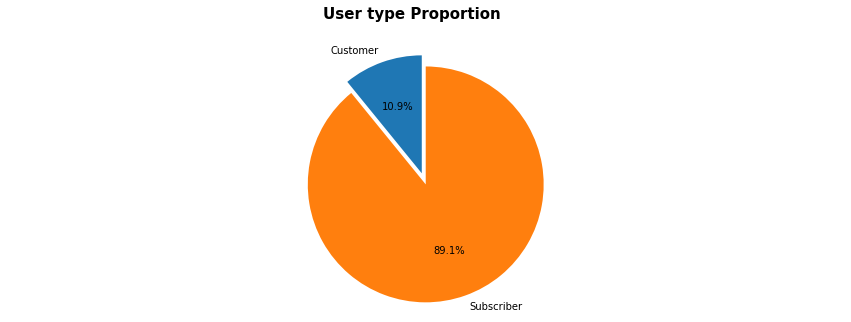

In [138]:
plt.figure(figsize=(15,5))
user_type_prop = [customer_proportion, subscriber_proportion]
plt.pie(user_type_prop, explode=(0, 0.1), labels=['Customer', 'Subscriber'],autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.suptitle('User type Proportion', fontsize=15, fontweight='semibold');

## Gender Proportion
### 77% of riders are male and 22% are female we have about 1% not defined.

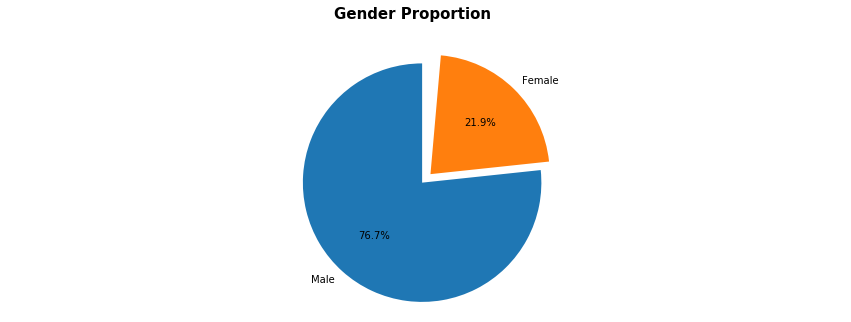

In [139]:
plt.figure(figsize=(15,5))
gender_prop = [male_proportion, female_proportion]
plt.pie(gender_prop, explode=(0, 0.1), labels=['Male', 'Female'],autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.suptitle('Gender Proportion', fontsize=15, fontweight='semibold');

## Subscriber VS Customers by months

####  Customers tend to rent a bikes in Septembers, And October is highest demaded month for Subscribers
#### Demand strts declining in winter season. June is lowest monthe for all user types.

Text(0.5, 1.0, 'Subscriber Per Months')

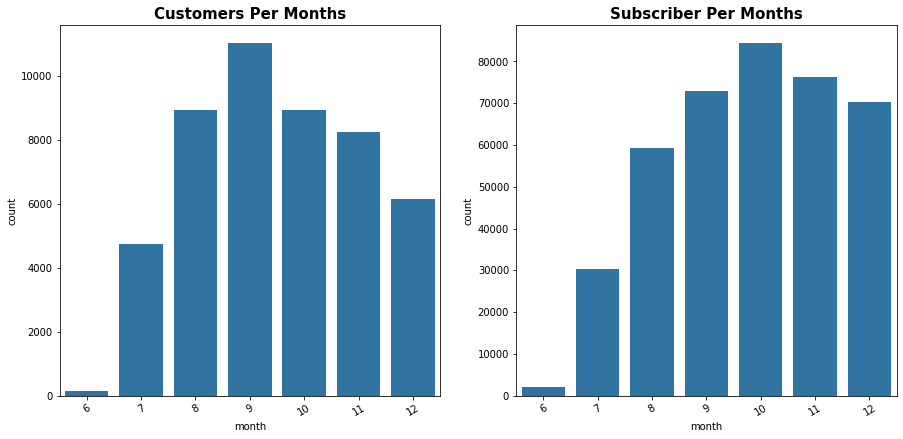

In [110]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
# Find out which week day has a highly demanded
# Monthly sharing system
sns.countplot(data=Customer,x='month',color=base_color)
plt.xticks(rotation=30)
plt.title('Customers Per Months', fontsize=15, fontweight='semibold')

plt.subplot(2,2,2)
# Monthly sharing system
sns.countplot(data=Subscriber,x='month',color=base_color)
plt.xticks(rotation=30)
plt.title('Subscriber Per Months', fontsize=15, fontweight='semibold')

In [70]:
Customer = clean_bike[clean_bike.user_type == 'Customer']
Subscriber = clean_bike[clean_bike.user_type == 'Subcriber']

## The Hieghset Stations Demanded

#### San Francisco Ferry Building" is the highly demanded station in Ford GoBike system, which is to increase number of bikes in those stations.

In [124]:
top_10= clean_bike['start_station_name'].value_counts().index[0:10]

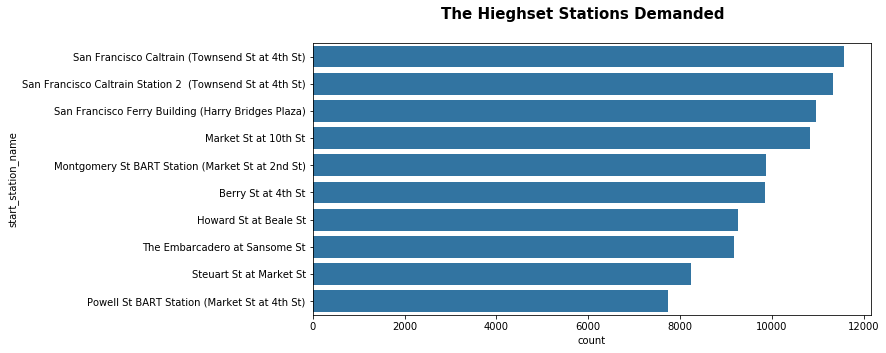

In [132]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]
sns.countplot(data = clean_bike, y = 'start_station_name', color = base_color, order= top_10)
plt.suptitle("The Hieghset Stations Demanded", fontsize=15, fontweight='semibold');

## Riders Age Group

#### Age group 30-40 is highest wاether in subscriber and customer. 20-3- and 40-50 are seems very close in subscriber but in customer 20-23 is higher than 40-50.

In [122]:
# Age grouping 
clean_bike['age_group'] = pd.cut(clean_bike.member_age, bins=[20, 30, 40, 50, 60], labels=['20-30','30-40','40-50','50-60'])

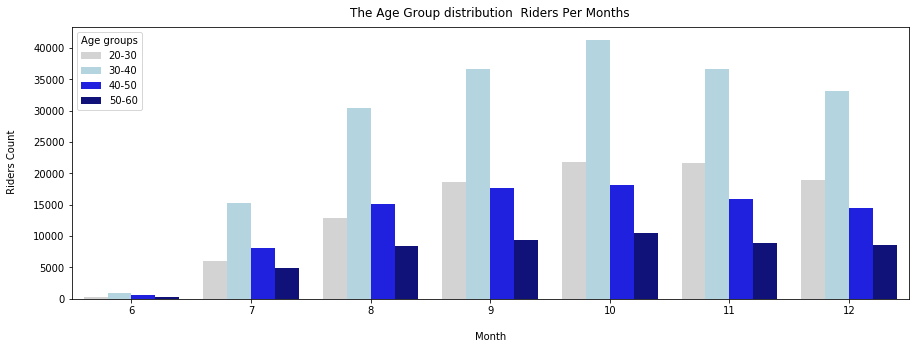

In [143]:
plt.figure(figsize=(15,5))
my_palette = {'20-30': 'lightgrey', '30-40': 'lightblue', '40-50': 'blue','50-60': 'darkblue' }
ax = sns.countplot(x='month', hue='age_group', palette=my_palette, data=clean_bike[clean_bike['age_group'].isin(['20-30', '30-40', '40-50', '50-60'])].sort_values(by=['month', 'age_group']))
plt.title('The Age Group distribution  Riders Per Months', y=1.015)
plt.xlabel('Month', labelpad=16)
plt.ylabel(' Riders Count', labelpad=16)
leg = ax.legend()
leg.set_title('Age groups',prop={'size':10})

## Summary


#### Most of bike trips duration around 13 minutes. 
#### Average users age is 38  
#### Most of users age between 30 to 40 years old age.
#### Subscribers user are 89%  and  customers 11%
#### and more than 77 % of bike riders are male and female about 22%.
####  10 most common station names for Ford GoBike riders.
#### 	San Francisco Ferry Building" is the highly demanded station in Ford GoBike system, which is to increase number of bikes in 
#### 	October in 2017 has the most trip duration. However, June has the lowest trip duration. I refer that the weather impacts the trip duration. 
#### 	Tuesday and Wednesday are the most duration workday. However the Sunday and Saturday are the lowest.
#### Users from 30 to 40 years old are more likely to rides bike for long durations
#### Males are the highest bike riders than females.
####  Customers tend to rent the bikes for longer time.
#### Age group 30-40 is highest wاether in subscriber and customer. 20-3- and 40-50 are seems very close in subscriber but customer 20-23 is higher than 40-50.


In [ ]:
# To convert this file to slide show 

!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle